In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

data = pd.read_csv("/kaggle/input/world-bank-dataset/world_bank_dataset.csv")

data.head()

,Country,Year,GDP (USD),Population,Life Expectancy,Unemployment Rate (%),CO2 Emissions (metric tons per capita),Access to Electricity (%)
0,Brazil,2010,1.493220e+12,829020000.0,66.7,3.81,10.79,76.76
1,Japan,2011,1.756270e+13,897010000.0,61.4,17.98,15.67,67.86
2,India,2012,1.642688e+13,669850000.0,69.1,16.02,2.08,81.08
3,Mexico,2013,1.189001e+13,113800000.0,80.1,6.26,19.13,53.46
4,India,2014,2.673020e+12,29710000.0,62.7,3.10,15.66,82.17


In [27]:
print(data.shape)
print(data.info())

data.describe()

(200, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Country                                 200 non-null    object 
 1   Year                                    200 non-null    int64  
 2   GDP (USD)                               200 non-null    float64
 3   Population                              200 non-null    float64
 4   Life Expectancy                         200 non-null    float64
 5   Unemployment Rate (%)                   200 non-null    float64
 6   CO2 Emissions (metric tons per capita)  200 non-null    float64
 7   Access to Electricity (%)               200 non-null    float64
dtypes: float64(6), int64(1), object(1)
memory usage: 12.6+ KB
None


,Year,GDP (USD),Population,Life Expectancy,Unemployment Rate (%),CO2 Emissions (metric tons per capita),Access to Electricity (%)
count,200.000000,2.000000e+02,2.000000e+02,200.000000,200.000000,200.000000,200.000000
mean,2014.500000,1.056867e+13,7.387908e+08,66.324500,13.271650,10.058200,72.876750
std,2.879489,5.547703e+12,4.389956e+08,9.818859,6.804166,5.712125,14.791291
min,2010.000000,1.011720e+12,9.970000e+06,50.500000,2.270000,0.810000,50.120000
25%,2012.000000,5.774120e+12,3.533775e+08,57.775000,6.810000,4.882500,60.315000
50%,2014.500000,1.050615e+13,7.216700e+08,64.900000,13.470000,9.745000,70.280000
75%,2017.000000,1.503451e+13,1.090860e+09,74.500000,18.542500,15.622500,86.297500
max,2019.000000,1.998377e+13,1.498060e+09,84.900000,24.790000,19.840000,99.760000


In [28]:
print(data.isnull().sum())

Country                                   0
Year                                      0
GDP (USD)                                 0
Population                                0
Life Expectancy                           0
Unemployment Rate (%)                     0
CO2 Emissions (metric tons per capita)    0
Access to Electricity (%)                 0
dtype: int64


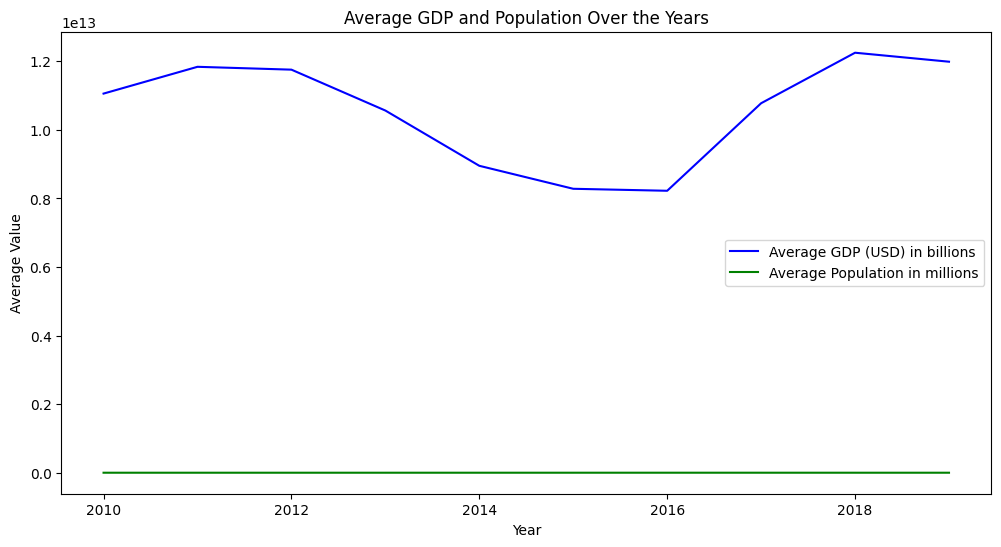

In [29]:
# Average GDP and Population over the years
avg_gdp_per_year = data.groupby('Year')['GDP (USD)'].mean()
avg_population_per_year = data.groupby('Year')['Population'].mean()

plt.figure(figsize=(12, 6))
plt.plot(avg_gdp_per_year, label='Average GDP (USD) in billions', color='blue')
plt.plot(avg_population_per_year, label='Average Population in millions', color='green')
plt.title("Average GDP and Population Over the Years")
plt.xlabel("Year")
plt.ylabel("Average Value")
plt.legend()
plt.show()

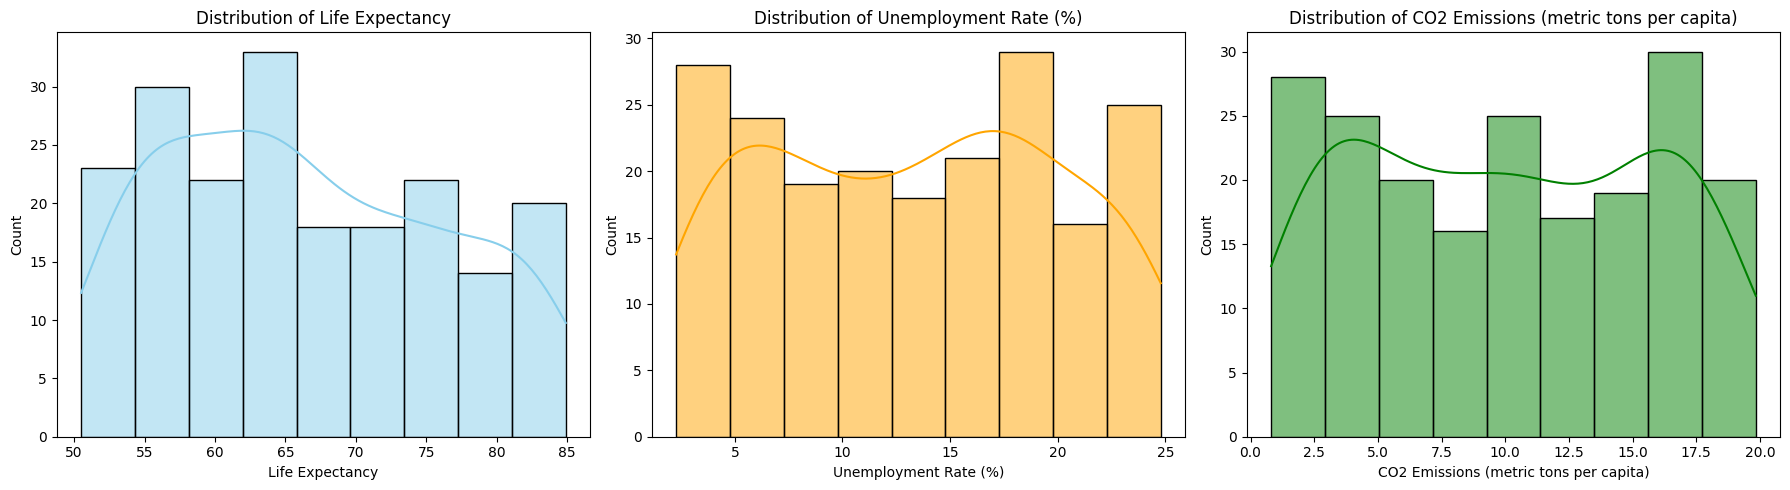

In [30]:
# Distribution plots
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

sns.histplot(data['Life Expectancy'], kde=True, ax=axs[0], color="skyblue")
axs[0].set_title("Distribution of Life Expectancy")

sns.histplot(data['Unemployment Rate (%)'], kde=True, ax=axs[1], color="orange")
axs[1].set_title("Distribution of Unemployment Rate (%)")

sns.histplot(data['CO2 Emissions (metric tons per capita)'], kde=True, ax=axs[2], color="green")
axs[2].set_title("Distribution of CO2 Emissions (metric tons per capita)")

plt.tight_layout()
plt.show()

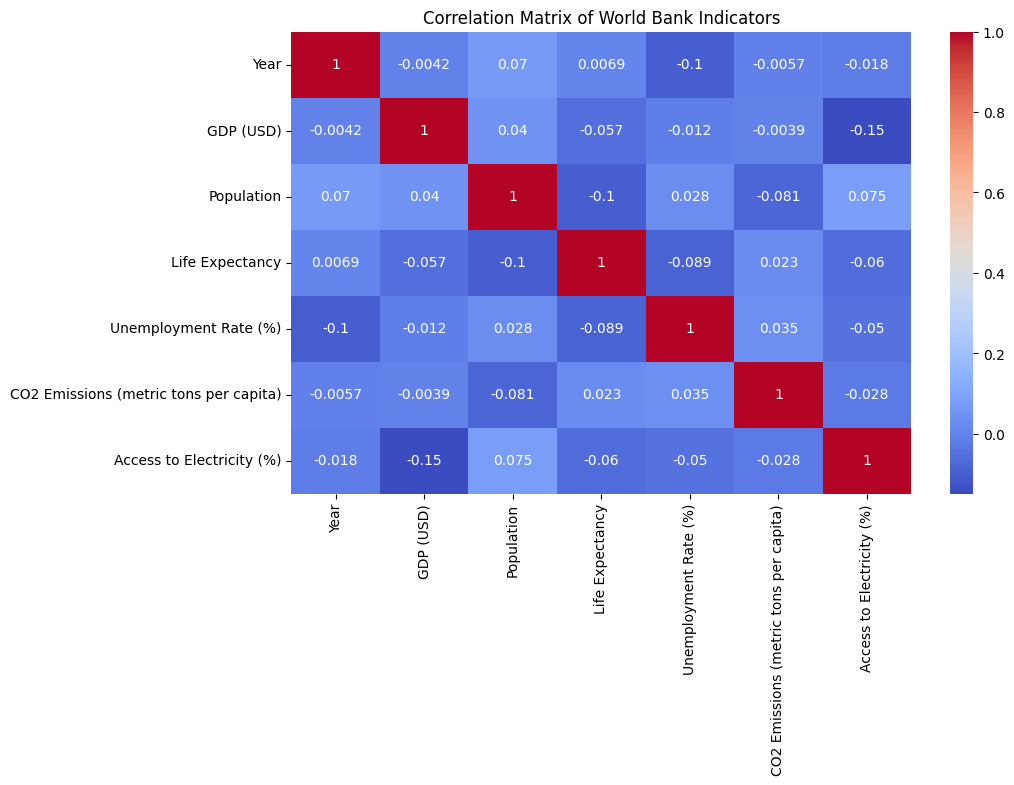

In [31]:
# Exclude non-numeric columns before calculating the correlation matrix
numeric_data = data.select_dtypes(include=[np.number])
correlation_matrix = numeric_data.corr()

# Plot the correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix of World Bank Indicators")
plt.show()

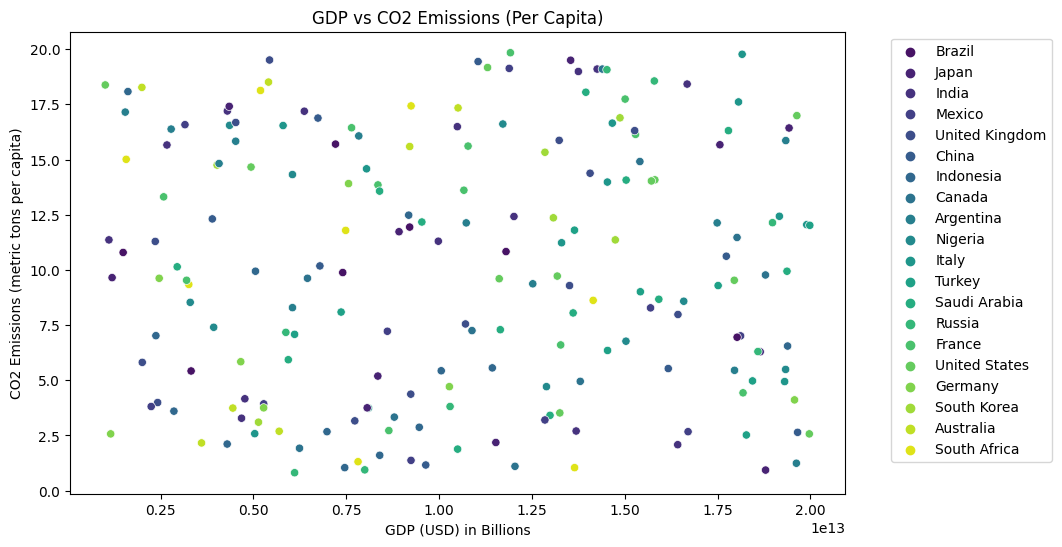

In [32]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='GDP (USD)', y='CO2 Emissions (metric tons per capita)', hue='Country', palette='viridis')
plt.title("GDP vs CO2 Emissions (Per Capita)")
plt.xlabel("GDP (USD) in Billions")
plt.ylabel("CO2 Emissions (metric tons per capita)")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

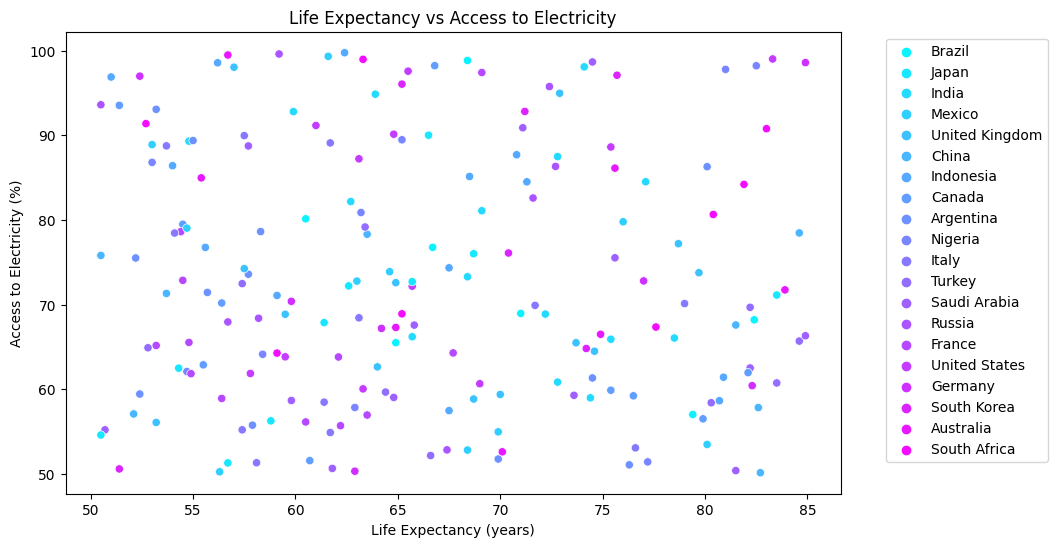

In [33]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='Life Expectancy', y='Access to Electricity (%)', hue='Country', palette='cool')
plt.title("Life Expectancy vs Access to Electricity")
plt.xlabel("Life Expectancy (years)")
plt.ylabel("Access to Electricity (%)")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [34]:
# Filter data for 2019
data_2019 = data[data['Year'] == 2019]

# Top 5 countries with highest and lowest GDP
top_gdp_countries = data_2019.nlargest(5, 'GDP (USD)')[['Country', 'GDP (USD)']]
bottom_gdp_countries = data_2019.nsmallest(5, 'GDP (USD)')[['Country', 'GDP (USD)']]

print("Top 5 countries with highest GDP in 2019:")
print(top_gdp_countries)
print("\nBottom 5 countries with lowest GDP in 2019:")
print(bottom_gdp_countries)

Top 5 countries with highest GDP in 2019:
           Country     GDP (USD)
69   United States  1.997029e+13
49          Brazil  1.802609e+13
139         Turkey  1.751509e+13
99         Nigeria  1.658939e+13
79    Saudi Arabia  1.591846e+13

Bottom 5 countries with lowest GDP in 2019:
            Country     GDP (USD)
89           France  3.202390e+12
199  United Kingdom  4.525980e+12
159          Canada  6.242390e+12
169          Turkey  7.362690e+12
29   United Kingdom  7.731710e+12


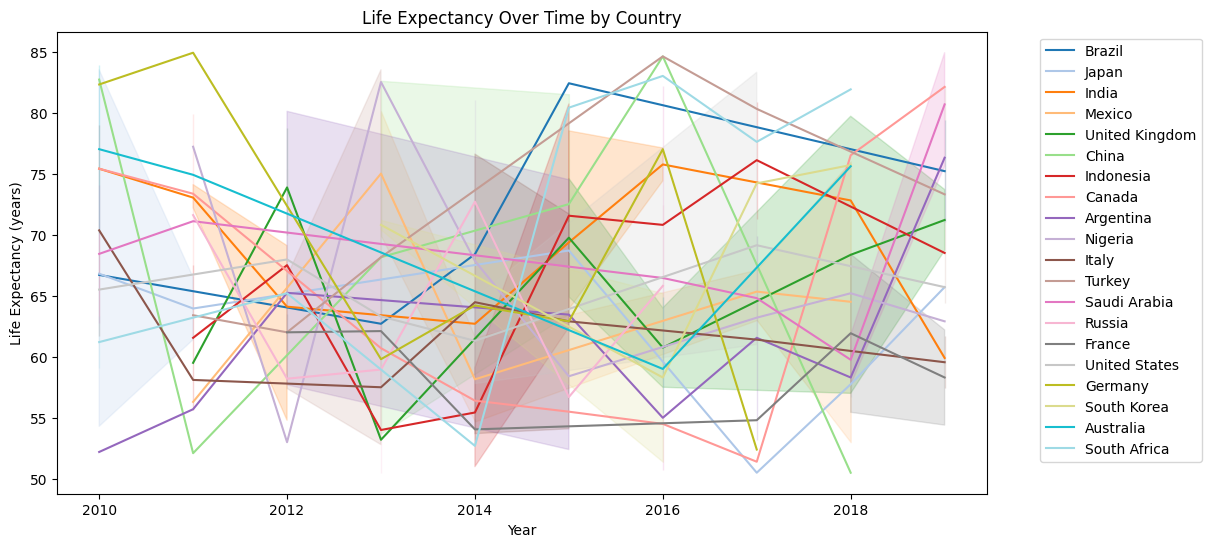

In [35]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=data, x='Year', y='Life Expectancy', hue='Country', palette='tab20')
plt.title("Life Expectancy Over Time by Country")
plt.xlabel("Year")
plt.ylabel("Life Expectancy (years)")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()